<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%204%20-%20Machine%20Leaning/code/ML_07_PCA_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.reshape(x_train, (len(x_train), -1)) / 255.
x_test = np.reshape(x_test, (len(x_test), -1)) / 255.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


# Part 1: PCA

In [ ]:
# Create a PCA object and train it
pca = PCA(n_components=2).fit(x_train)

(60000, 2)
(10000, 2)


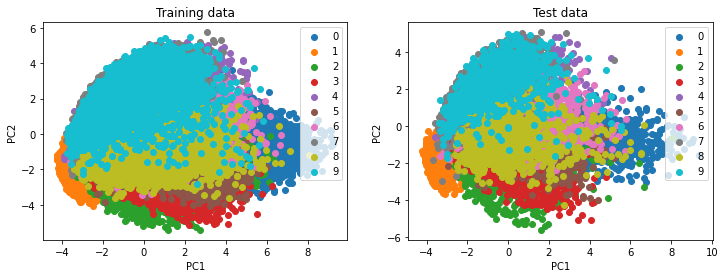

In [ ]:
# Transform data and plot it
z_train = pca.transform(x_train)
z_test = pca.transform(x_test)

print(z_train.shape)
print(z_test.shape)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train==cl, 0], z_train[y_train==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1, 2, 2)
plt.title("Test data")
for cl in range(10):
  plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715817 0.01692111 0.01578641 0.01482948 0.01324547 0.01276857
 0.01186936 0.01152439]


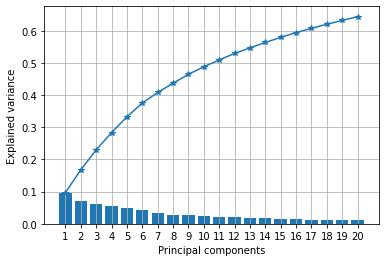

In [ ]:
# Lets try with 20 PC
pca = PCA(n_components=20).fit(x_train)

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), range(1, len(pca.explained_variance_ratio_)+1))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-*')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
print(pca.explained_variance_ratio_)

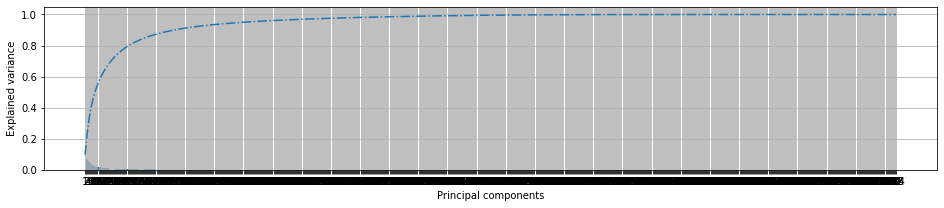

In [ ]:
# Revisa la documentación, y encuentra una manera de graficar la varianza 
# explicada de los 784 componentes.
pca = PCA(n_components=784).fit(x_train)

plt.figure(figsize=(16, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), range(1, len(pca.explained_variance_ratio_)+1))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-.')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
plt.show()

95% of variance is obtaine with 153 PC's


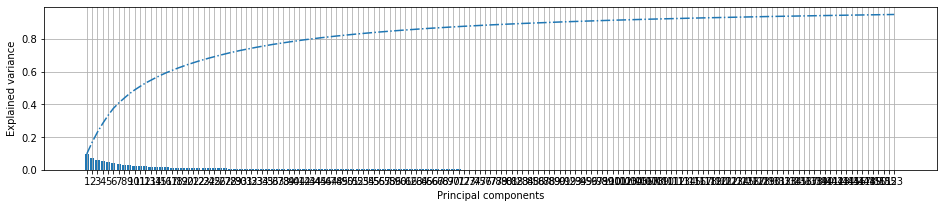

In [ ]:
# ¿Con cuántos PC conseguirías 95% de la varianza?
# ¿Qué pasa si intentas generar más PC que las variables iniciales, ej., 900?
# ¿Qué crees que represente la variable "singular_values_" del modelo pca?

maxPC = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0]
print(f"95% of variance is obtaine with {maxPC} PC's")

plt.figure(figsize=(16, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), pca.explained_variance_ratio_[:maxPC])
plt.xticks(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), range(1, len(pca.explained_variance_ratio_[:maxPC])+1))
plt.plot(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), np.cumsum(pca.explained_variance_ratio_[:maxPC]), '-.')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
plt.show()

# Part 2: t-SNE

In [ ]:
# Let's use now t-SNE
# NOTA: Usen pocos datos, ej, 5000, porque puede tomar demasiado tiempo
z_train = TSNE(n_components=2).fit_transform(x_train[:10000])
print(z_train.shape)

(10000, 2)


In [ ]:
# Now with the test set. Twice
z_test1 = TSNE(n_components=2).fit_transform(x_test)
print(z_test1.shape)

z_test2 = TSNE(n_components=2).fit_transform(x_test)
print(z_test2.shape)

(10000, 2)
(10000, 2)


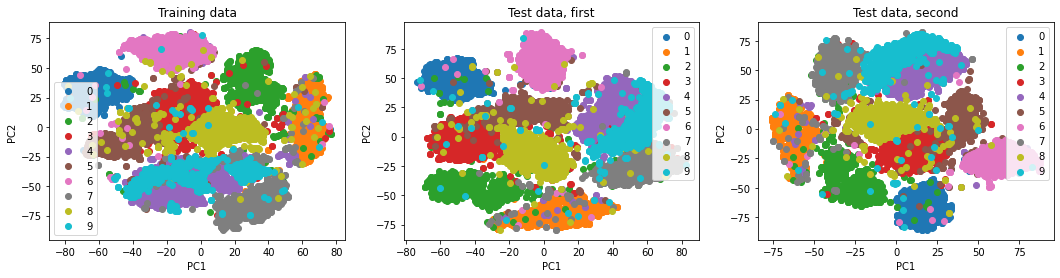

In [ ]:
#
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train[:10000]==cl, 0], z_train[y_train[:10000]==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 2)
plt.title("Test data, first")
for cl in range(10):
  plt.scatter(z_test1[y_test==cl, 0], z_test1[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 3)
plt.title("Test data, second")
for cl in range(10):
  plt.scatter(z_test2[y_test==cl, 0], z_test2[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [ ]:
# ¿Por qué reentrenamos para el set de test, en vez de usar un método transform?
# ¿Por qué nos da resultados distintos en cada corrida, incluso aplicado sobre los
# mismos datos?

# Part 3: SOM's

In [ ]:
# https://github.com/JustGlowing/minisom
!pip install minisom

In [ ]:
from minisom import MiniSom

In [ ]:
# Train it
som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.5)
som.train(x_train, 2000, random_order=True)

In [ ]:
# See the set of weights
som.get_weights().shape

(30, 30, 784)

In [ ]:
# See mapping for one sample
som.winner(x_train[0])

(24, 23)

In [ ]:
# Map training and test sets (puede tardar unos 5 minutos)
z_train = np.array([som.winner(x) for x in x_train])
z_test = np.array([som.winner(x) for x in x_test])

# Add a bit of noise for better population of the space
#z_train = z_train + np.random.normal(loc=0.0, scale=0.2, size=(len(z_train), 2))
#z_test = z_test + np.random.normal(loc=0.0, scale=0.2, size=(len(z_test), 2))

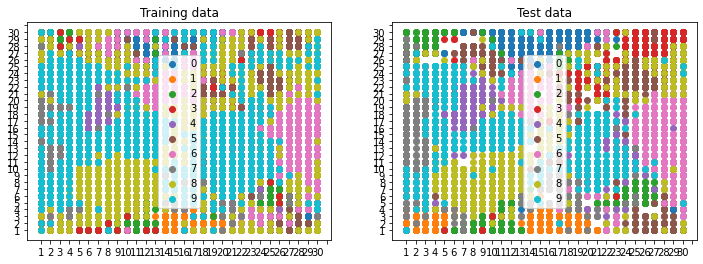

In [ ]:
# Plot mapping
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train==cl, 0], z_train[y_train==cl, 1], label=cl)
plt.xticks(range(31), range(1, 31))
plt.yticks(range(31), range(1, 31))
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Test data")
for cl in range(10):
  plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.xticks(range(31), range(1, 31))
plt.yticks(range(31), range(1, 31))
plt.legend()
plt.show()

In [ ]:
# Grafica descomentando las dos líneas que siguen después de crear z_train y
# z_test ¿Qué efecto produce descomentarlas?

In [1]:
# ¿Qué pasa si disminuyes o aumentas los valores de sigma?
# ¿Qué pasa si disminuyes o aumentas la tasa de aprendizaje?